<a href="https://colab.research.google.com/github/liae15/ColabComp345/blob/main/Keywords_Collocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keywords & Collocations: Interactive Playground

This notebook explores two key concepts from our class:
1. **Keywords (Unigram Frequencies)** - Finding characteristic words in different texts
2. **Collocations** - Discovering words that frequently appear together

We'll work with three corpora: Jane Austen's *Emma*, Herman Melville's *Moby Dick*, and the Brown Corpus (a balanced corpus of American English).

**We'll rely on the NLTK library for things like loading corpora and doing basic tokenization.**


## Setup: Import Libraries and Download Data


In [ ]:
# Import required libraries
import nltk
from nltk.corpus import stopwords, gutenberg, brown
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Set plotting style
sns.set_theme(style="whitegrid", palette="muted")
sns.set_context("notebook", font_scale=1.1)

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('gutenberg', quiet=True)
nltk.download('brown', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("✓ Libraries loaded and data downloaded successfully!")


✓ Libraries loaded and data downloaded successfully!


---
## Part 1: Keywords and Unigram Frequencies

**Keywords** are words that are particularly characteristic of a text or corpus. They help us understand what makes a text distinctive. We'll explore this by looking at word frequencies across different texts.


### Loading Our Corpora

Let's load three different texts to compare:
- **Emma** by Jane Austen (19th century novel)
- **Moby Dick** by Herman Melville (19th century novel)
- **Brown Corpus** (balanced corpus of American English from the 1960s)


In [ ]:
# Load the three corpora
emma_words = gutenberg.words('austen-emma.txt')
moby_words = gutenberg.words('melville-moby_dick.txt')
brown_words = brown.words()

# Convert to lowercase and keep only alphabetic tokens
emma_tokens = [w.lower() for w in emma_words if w.isalpha()]
moby_tokens = [w.lower() for w in moby_words if w.isalpha()]
brown_tokens = [w.lower() for w in brown_words if w.isalpha()]

print(f"Emma: {len(emma_tokens):,} tokens")
print(f"Moby Dick: {len(moby_tokens):,} tokens")
print(f"Brown Corpus: {len(brown_tokens):,} tokens")


Emma: 161,600 tokens
Moby Dick: 218,361 tokens
Brown Corpus: 981,716 tokens


### Computing Word Frequencies

Let's count how often each word appears in each corpus.


In [ ]:
# Count word frequencies
emma_freq = Counter(emma_tokens)
moby_freq = Counter(moby_tokens)
brown_freq = Counter(brown_tokens)

print(f"Emma: {len(emma_freq):,} unique words")
print(f"Moby Dick: {len(moby_freq):,} unique words")
print(f"Brown Corpus: {len(brown_freq):,} unique words")


Emma: 7,079 unique words
Moby Dick: 16,948 unique words
Brown Corpus: 40,234 unique words


### Most Frequent Words

Let's look at the most common words in each corpus. These are the **raw frequencies** (absolute counts).


In [ ]:
print("=" * 70)
print("EMMA - TOP 10 WORDS")
print("=" * 70)
for i, (word, count) in enumerate(emma_freq.most_common(10), 1):
    print(f"{i:2d}. {word:15s} - {count:,} times")

print("\n" + "=" * 70)
print("MOBY DICK - TOP 10 WORDS")
print("=" * 70)
for i, (word, count) in enumerate(moby_freq.most_common(10), 1):
    print(f"{i:2d}. {word:15s} - {count:,} times")

print("\n" + "=" * 70)
print("BROWN CORPUS - TOP 10 WORDS")
print("=" * 70)
for i, (word, count) in enumerate(brown_freq.most_common(10), 1):
    print(f"{i:2d}. {word:15s} - {count:,} times")


EMMA - TOP 10 WORDS
 1. to              - 5,239 times
 2. the             - 5,201 times
 3. and             - 4,896 times
 4. of              - 4,291 times
 5. i               - 3,178 times
 6. a               - 3,129 times
 7. it              - 2,528 times
 8. her             - 2,469 times
 9. was             - 2,398 times
10. she             - 2,340 times

MOBY DICK - TOP 10 WORDS
 1. the             - 14,431 times
 2. of              - 6,609 times
 3. and             - 6,430 times
 4. a               - 4,736 times
 5. to              - 4,625 times
 6. in              - 4,172 times
 7. that            - 3,085 times
 8. his             - 2,530 times
 9. it              - 2,522 times
10. i               - 2,127 times

BROWN CORPUS - TOP 10 WORDS
 1. the             - 69,971 times
 2. of              - 36,412 times
 3. and             - 28,853 times
 4. to              - 26,158 times
 5. a               - 23,195 times
 6. in              - 21,337 times
 7. that            - 10,594 times

#### Observation

Notice that the most frequent words are **function words** (articles, prepositions, pronouns). These are common across all texts. They don't tell us much about what makes each text unique! We'll address that once we start looking at how to find keywords.


### Understanding Relative Frequencies

**Problem**: Emma has fewer words than Moby Dick, which has fewer than Brown. Comparing raw counts isn't fair!

**Solution**: Use **relative frequencies** (proportions) instead of raw counts.

**Relative Frequency** = (Word Count) / (Total Words)

This tells us what proportion of the text is made up of each word.


In [ ]:
def relative_frequency(freq_counter, total_words):
    """Convert raw frequencies to relative frequencies"""
    return {word: count / total_words for word, count in freq_counter.items()}

# Calculate relative frequencies
emma_rel_freq = relative_frequency(emma_freq, len(emma_tokens))
moby_rel_freq = relative_frequency(moby_freq, len(moby_tokens))
brown_rel_freq = relative_frequency(brown_freq, len(brown_tokens))



Let's begin by seeing how even when raw frequencies are different, relative frequencies may be roughly the same:

In [ ]:
# Let's compare the word "whale" across all three corpora
word = "and"
print(f"Comparing the word '{word}' across corpora:\n")
print(f"Emma:")
print(f"  Raw frequency: {emma_freq.get(word, 0):,}")
print(f"  Relative frequency: {emma_rel_freq.get(word, 0):.6f} ({emma_rel_freq.get(word, 0)*100:.4f}%)")

print(f"\nMoby Dick:")
print(f"  Raw frequency: {moby_freq.get(word, 0):,}")
print(f"  Relative frequency: {moby_rel_freq.get(word, 0):.6f} ({moby_rel_freq.get(word, 0)*100:.4f}%)")

print(f"\nBrown Corpus:")
print(f"  Raw frequency: {brown_freq.get(word, 0):,}")
print(f"  Relative frequency: {brown_rel_freq.get(word, 0):.6f} ({brown_rel_freq.get(word, 0)*100:.4f}%)")

Comparing the word 'and' across corpora:

Emma:
  Raw frequency: 4,896
  Relative frequency: 0.030297 (3.0297%)

Moby Dick:
  Raw frequency: 6,430
  Relative frequency: 0.029447 (2.9447%)

Brown Corpus:
  Raw frequency: 28,853
  Relative frequency: 0.029390 (2.9390%)


Try doing this for any other words that may seem interesting!

In [ ]:
# Let's compare the word "whale" across all three corpora
word = 'Replace_with_your_word'
print(f"Comparing the word '{word}' across corpora:\n")
print(f"Emma:")
print(f"  Raw frequency: {emma_freq.get(word, 0):,}")
print(f"  Relative frequency: {emma_rel_freq.get(word, 0):.6f} ({emma_rel_freq.get(word, 0)*100:.4f}%)")

print(f"\nMoby Dick:")
print(f"  Raw frequency: {moby_freq.get(word, 0):,}")
print(f"  Relative frequency: {moby_rel_freq.get(word, 0):.6f} ({moby_rel_freq.get(word, 0)*100:.4f}%)")

print(f"\nBrown Corpus:")
print(f"  Raw frequency: {brown_freq.get(word, 0):,}")
print(f"  Relative frequency: {brown_rel_freq.get(word, 0):.6f} ({brown_rel_freq.get(word, 0)*100:.4f}%)")

Comparing the word 'Replace_with_your_word' across corpora:

Emma:
  Raw frequency: 0
  Relative frequency: 0.000000 (0.0000%)

Moby Dick:
  Raw frequency: 0
  Relative frequency: 0.000000 (0.0000%)

Brown Corpus:
  Raw frequency: 0
  Relative frequency: 0.000000 (0.0000%)


### Finding Keywords: Words that Distinguish Texts

A **keyword** is a word that appears significantly more often in one corpus compared to another (reference) corpus.

Let's find words that are characteristic of *Moby Dick* compared to the Brown Corpus.


In [ ]:
def find_keywords(target_freq, target_total, reference_freq, reference_total):
    """
    Find words that are overrepresented in target corpus compared to reference corpus.
    Returns words sorted by their relative frequency ratio.
    """
    keywords = []

    for word, count in target_freq.items():
        # Calculate relative frequencies
        target_rel = count / target_total
        reference_rel = reference_freq.get(word, 0) / reference_total

        # Avoid division by zero
        if reference_rel == 0:
            reference_rel = 0.5 / reference_total  # Smoothing

        # Calculate ratio (how many times more frequent in target vs reference)
        ratio = target_rel / reference_rel

        keywords.append((word, count, target_rel, reference_rel, ratio))

    # Sort by ratio (descending)
    keywords.sort(key=lambda x: x[4], reverse=True)

    return keywords

# Find keywords in Moby Dick (compared to Brown Corpus)
moby_keywords = find_keywords(moby_freq, len(moby_tokens),
                               brown_freq, len(brown_tokens))

print("=" * 90)
print("KEYWORDS IN MOBY DICK (compared to Brown Corpus)")
print("=" * 90)
print(f"{'Rank':<6}{'Word':<15}{'Count':<10}{'Rel. Freq':<15}{'Brown Rel.':<15}{'Ratio':<10}")
print("-" * 90)

for i, (word, count, target_rel, ref_rel, ratio) in enumerate(moby_keywords[:20], 1):
    print(f"{i:<6}{word:<15}{count:<10}{target_rel:<15.6f}{ref_rel:<15.6f}{ratio:<10.2f}")


KEYWORDS IN MOBY DICK (compared to Brown Corpus)
Rank  Word           Count     Rel. Freq      Brown Rel.     Ratio     
------------------------------------------------------------------------------------------
1     whale          1226      0.005615       0.000001       11023.80  
2     ahab           511       0.002340       0.000001       4594.75   
3     whales         268       0.001227       0.000001       2409.77   
4     stubb          257       0.001177       0.000001       2310.86   
5     queequeg       252       0.001154       0.000001       2265.90   
6     sperm          244       0.001117       0.000001       2193.97   
7     starbuck       198       0.000907       0.000001       1780.35   
8     pequod         173       0.000792       0.000001       1555.56   
9     ll             114       0.000522       0.000001       1025.05   
10    leviathan      96        0.000440       0.000001       863.20    
11    jonah          85        0.000389       0.000001       764.29 

#### Interpretation

The **Ratio** column shows how many times more frequent each word is in Moby Dick compared to the Brown Corpus. High ratios indicate keywords that are characteristic of Moby Dick!

As expected, nautical and whaling terms dominate: "whale", "ahab", "whaling", "harpoon", "aye", etc.


In [ ]:
# Now let's find keywords in Emma
emma_keywords = find_keywords(emma_freq, len(emma_tokens),
                               brown_freq, len(brown_tokens))

print("=" * 90)
print("KEYWORDS IN EMMA (compared to Brown Corpus)")
print("=" * 90)
print(f"{'Rank':<6}{'Word':<15}{'Count':<10}{'Rel. Freq':<15}{'Brown Rel.':<15}{'Ratio':<10}")
print("-" * 90)

for i, (word, count, target_rel, ref_rel, ratio) in enumerate(emma_keywords[:20], 1):
    print(f"{i:<6}{word:<15}{count:<10}{target_rel:<15.6f}{ref_rel:<15.6f}{ratio:<10.2f}")


KEYWORDS IN EMMA (compared to Brown Corpus)
Rank  Word           Count     Rel. Freq      Brown Rel.     Ratio     
------------------------------------------------------------------------------------------
1     mr             1153      0.007135       0.000001       14008.89  
2     knightley      389       0.002407       0.000001       4726.33   
3     elton          385       0.002382       0.000001       4677.73   
4     mrs            699       0.004325       0.000001       4246.41   
5     woodhouse      313       0.001937       0.000001       3802.93   
6     hartfield      160       0.000990       0.000001       1943.99   
7     highbury       125       0.000774       0.000001       1518.74   
8     randalls       90        0.000557       0.000001       1093.50   
9     isabella       69        0.000427       0.000001       838.35    
10    fairfax        241       0.001491       0.000002       732.03    
11    goddard        59        0.000365       0.000001       716.85    
1

Emma's keywords include character names (emma, knightley, woodhouse, isabella) and social terms (e.g. obliging) typical of Austen's novels!


### Your Turn: Find Keywords for a Specific Word

Try comparing how a specific word is used across different corpora!


Comparing 'love' across all three corpora:

Emma: 117 times (0.0724% of words)
Moby Dick: 24 times (0.0110% of words)
Brown: 231 times (0.0235% of words)


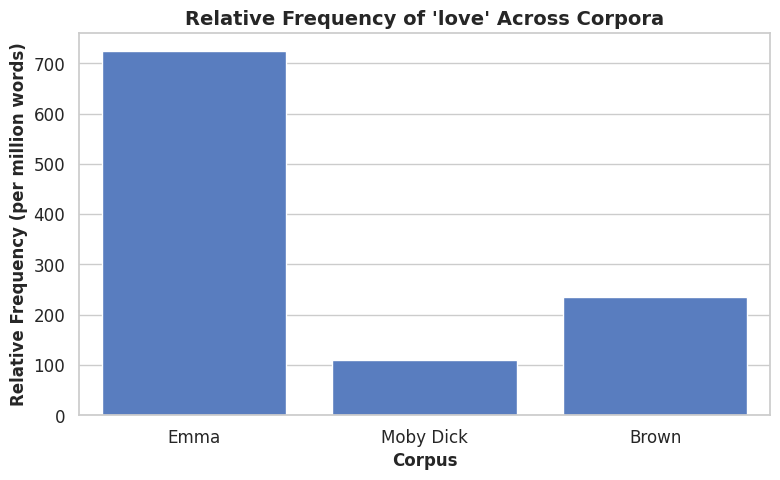

In [ ]:
# Try your own word!
my_word = "love"  # Change this to any word you want

print(f"Comparing '{my_word}' across all three corpora:\n")

emma_count = emma_freq.get(my_word, 0)
emma_rel = emma_rel_freq.get(my_word, 0)

moby_count = moby_freq.get(my_word, 0)
moby_rel = moby_rel_freq.get(my_word, 0)

brown_count = brown_freq.get(my_word, 0)
brown_rel = brown_rel_freq.get(my_word, 0)

print(f"Emma: {emma_count:,} times ({emma_rel*100:.4f}% of words)")
print(f"Moby Dick: {moby_count:,} times ({moby_rel*100:.4f}% of words)")
print(f"Brown: {brown_count:,} times ({brown_rel*100:.4f}% of words)")

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
corpora = ['Emma', 'Moby Dick', 'Brown']
rel_freqs = [emma_rel * 1000000, moby_rel * 1000000, brown_rel * 1000000]

sns.barplot(x=corpora, y=rel_freqs, ax=ax)
ax.set_ylabel('Relative Frequency (per million words)', fontsize=12, fontweight='bold')
ax.set_xlabel('Corpus', fontsize=12, fontweight='bold')
ax.set_title(f"Relative Frequency of '{my_word}' Across Corpora", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---
## Part 2: Collocations and Association Metrics

**Collocations** are words that frequently appear together. They're more than just words that happen to co-occur -- these are word pairs that appear together more often than we'd expect by chance.

Examples:
- "strong coffee" (not "powerful coffee")
- "commit murder" (not "commit homicide")
- "white whale" (very specific to Moby Dick!)


### Generating Bigrams (2-word sequences)

A bigram is simply two consecutive words. Let's generate all bigrams in our corpora.


In [ ]:
def generate_bigrams(tokens):
    """Generate bigrams (2-word sequences) from tokens"""
    bigrams = []
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        bigrams.append(bigram)
    return bigrams

# Generate bigrams for all corpora (using ALL tokens, not just content words)
emma_bigrams = generate_bigrams(emma_tokens)
moby_bigrams = generate_bigrams(moby_tokens)
brown_bigrams = generate_bigrams(brown_tokens)

# Count bigram frequencies
emma_bigram_freq = Counter(emma_bigrams)
moby_bigram_freq = Counter(moby_bigrams)
brown_bigram_freq = Counter(brown_bigrams)

print(f"Emma: {len(emma_bigrams):,} total bigrams, {len(emma_bigram_freq):,} unique")
print(f"Moby Dick: {len(moby_bigrams):,} total bigrams, {len(moby_bigram_freq):,} unique")
print(f"Brown: {len(brown_bigrams):,} total bigrams, {len(brown_bigram_freq):,} unique")


Emma: 161,599 total bigrams, 65,867 unique
Moby Dick: 218,360 total bigrams, 116,283 unique
Brown: 981,715 total bigrams, 425,431 unique


### Most Common Bigrams

Let's look at the most frequent bigrams in each corpus.


In [ ]:
print("=" * 70)
print("EMMA - TOP 15 BIGRAMS")
print("=" * 70)
for i, (bigram, count) in enumerate(emma_bigram_freq.most_common(15), 1):
    print(f"{i:2d}. {bigram[0]:3s} {bigram[1]:12s} - {count:,} times")

print("\n" + "=" * 70)
print("MOBY DICK - TOP 15 BIGRAMS")
print("=" * 70)
for i, (bigram, count) in enumerate(moby_bigram_freq.most_common(15), 1):
    print(f"{i:2d}. {bigram[0]:3s} {bigram[1]:12s} - {count:,} times")

print("\n" + "=" * 70)
print("BROWN CORPUS - TOP 15 BIGRAMS")
print("=" * 70)
for i, (bigram, count) in enumerate(brown_bigram_freq.most_common(15), 1):
    print(f"{i:2d}. {bigram[0]:3s} {bigram[1]:12s} - {count:,} times")


EMMA - TOP 15 BIGRAMS
 1. to  be           - 607 times
 2. of  the          - 566 times
 3. it  was          - 448 times
 4. in  the          - 446 times
 5. i   am           - 395 times
 6. she had          - 332 times
 7. she was          - 328 times
 8. had been         - 308 times
 9. it  is           - 299 times
10. mr  knightley    - 299 times
11. i   have         - 281 times
12. could not          - 278 times
13. of  her          - 262 times
14. mrs weston       - 256 times
15. have been         - 243 times

MOBY DICK - TOP 15 BIGRAMS
 1. of  the          - 1,879 times
 2. in  the          - 1,182 times
 3. to  the          - 731 times
 4. from the          - 440 times
 5. the whale        - 407 times
 6. of  his          - 373 times
 7. and the          - 370 times
 8. on  the          - 359 times
 9. of  a            - 334 times
10. at  the          - 330 times
11. to  be           - 329 times
12. by  the          - 320 times
13. with the          - 312 times
14. for the      

#### Problem!!!

The most frequent bigrams are mostly function word combinations ("of the", "in the", etc.). This isn't very informative!

We need a better way to find **meaningful** collocations.


### Pointwise Mutual Information (PMI)

**PMI** measures how much more likely two words appear together than we'd expect by chance.

**Formula**: PMI(x, y) = log₂(P(x,y) / (P(x) × P(y)))

- **High PMI**: Words appear together much more than expected → strong collocation
- **PMI ≈ 0**: Words appear together about as expected by chance
- **Negative PMI**: Words appear together less than expected

Let's implement PMI!


In [ ]:
def calculate_pmi(bigram_freq, unigram_freq, total_bigrams, total_unigrams):
    """
    Calculate PMI for all bigrams.

    PMI(x,y) = log2(P(x,y) / (P(x) * P(y)))
    """
    pmi_scores = []

    for bigram, bigram_count in bigram_freq.items():
        word1, word2 = bigram

        # Get unigram counts
        word1_count = unigram_freq[word1]
        word2_count = unigram_freq[word2]

        # Calculate probabilities
        p_bigram = bigram_count / total_bigrams # Note: total_bigrams is just total_unigrams-1. So it wouldn't be hugely off if we used total_unigrams here instead.
        p_word1 = word1_count / total_unigrams
        p_word2 = word2_count / total_unigrams

        # Calculate PMI
        pmi = math.log2(p_bigram / (p_word1 * p_word2))

        pmi_scores.append((bigram, pmi, bigram_count))

    return pmi_scores

# Calculate PMI for Moby Dick
moby_pmi = calculate_pmi(moby_bigram_freq, moby_freq, len(moby_bigrams), len(moby_tokens))

# Sort by PMI score (descending)
moby_pmi_sorted = sorted(moby_pmi, key=lambda x: x[1], reverse=True)

print("=" * 80)
print("MOBY DICK - TOP 20 COLLOCATIONS BY PMI")
print("=" * 80)
print(f"{'Rank':<6}{'Bigram':<30}{'PMI Score':<15}{'Frequency':<12}")
print("-" * 80)

for i, (bigram, pmi, count) in enumerate(moby_pmi_sorted[:20], 1):
    bigram_str = f"{bigram[0]} {bigram[1]}"
    print(f"{i:<6}{bigram_str:<30}{pmi:<15.4f}{count:<12}")


MOBY DICK - TOP 20 COLLOCATIONS BY PMI
Rank  Bigram                        PMI Score      Frequency   
--------------------------------------------------------------------------------
1     herman melville               17.7364        1           
2     melville etymology            17.7364        1           
3     ger wallen                    17.7364        1           
4     walw ian                      17.7364        1           
5     whoel anglo                   17.7364        1           
6     hwal swedish                  17.7364        1           
7     painstaking burrower          17.7364        1           
8     higgledy piggledy             17.7364        1           
9     gudgeon retires               17.7364        1           
10    montaigne apology             17.7364        1           
11    raimond sebond                17.7364        1           
12    cartloads stowe               17.7364        1           
13    returne againe                17.7364     

#### ⚠️ Problem with Low Frequencies

Notice that many top PMI bigrams are extremely rare combinations that only appear once! PMI can overweight rare combinations, because if P(x)P(y) gets very small in the demoninator (e.g. if word y is extremely infrequent), the whole value gets quite large.

**Solution**: Filter by minimum frequency (only consider bigrams that appear at least N times).


In [ ]:
# Filter by minimum frequency
min_freq = 50

moby_pmi_filtered = [(bigram, pmi, count) for bigram, pmi, count in moby_pmi_sorted if count >= min_freq]

print("=" * 80)
print(f"MOBY DICK - TOP 20 COLLOCATIONS BY PMI (min frequency = {min_freq})")
print("=" * 80)
print(f"{'Rank':<6}{'Bigram':<30}{'PMI Score':<15}{'Frequency':<12}")
print("-" * 80)

for i, (bigram, pmi, count) in enumerate(moby_pmi_filtered[:20], 1):
    bigram_str = f"{bigram[0]} {bigram[1]}"
    print(f"{i:<6}{bigram_str:<30}{pmi:<15.4f}{count:<12}")


MOBY DICK - TOP 20 COLLOCATIONS BY PMI (min frequency = 50)
Rank  Bigram                        PMI Score      Frequency   
--------------------------------------------------------------------------------
1     moby dick                     11.3440        84          
2     don t                         9.3274         119         
3     each other                    7.7083         51          
4     on board                      7.2023         53          
5     sperm whale                   7.0537         182         
6     at least                      6.9046         55          
7     has been                      6.4934         50          
8     at last                       6.4273         144         
9     have been                     6.3852         122         
10    i am                          6.3834         74          
11    captain ahab                  6.3314         62          
12    more than                     6.3091         57          
13    had been             

#### 🐋 Much Better!

Now we see meaningful collocations like:
- "sperm whale"
- "white whale"
- "moby dick"
- Character names and nautical terms

These are truly characteristic phrases from Moby Dick!


In [ ]:
# Now let's find collocations in Emma

# Filter by minimum frequency
min_freq = 50

emma_pmi = calculate_pmi(emma_bigram_freq, emma_freq, len(emma_bigrams), len(emma_tokens))
emma_pmi_sorted = sorted(emma_pmi, key=lambda x: x[1], reverse=True)
emma_pmi_filtered = [(bigram, pmi, count) for bigram, pmi, count in emma_pmi_sorted if count >= min_freq]

print("=" * 80)
print(f"EMMA - TOP 20 COLLOCATIONS BY PMI (min frequency = {min_freq})")
print("=" * 80)
print(f"{'Rank':<6}{'Bigram':<30}{'PMI Score':<15}{'Frequency':<12}")
print("-" * 80)

for i, (bigram, pmi, count) in enumerate(emma_pmi_filtered[:20], 1):
    bigram_str = f"{bigram[0]} {bigram[1]}"
    print(f"{i:<6}{bigram_str:<30}{pmi:<15.4f}{count:<12}")


EMMA - TOP 20 COLLOCATIONS BY PMI (min frequency = 50)
Rank  Bigram                        PMI Score      Frequency   
--------------------------------------------------------------------------------
1     frank churchill               9.0327         151         
2     dare say                      8.8157         51          
3     great deal                    8.7341         64          
4     young man                     8.2329         84          
5     john knightley                8.0646         58          
6     jane fairfax                  7.9500         111         
7     mrs goddard                   7.8529         59          
8     every body                    7.7129         109         
9     miss bates                    7.6864         113         
10    am sure                       7.6665         109         
11    miss smith                    7.4579         58          
12    miss woodhouse                7.2203         173         
13    miss fairfax              

Emma's collocations include character names (Frank Churchill, Jane Fairfax, Mr. Knightley) and social phrases (e.g. "dare say")!


### Finding Collocations for a Specific Word

Let's find what words commonly appear with a target word. Once again, we'll demonstrate what happens when we do and don't include some minimum frequency.

Note: the **Position** column shows whether the word appears to the **left** or **right** of "whale" in the bigram.

For example:
- "sperm" (left) → "sperm whale"
- "white" (left) → "white whale"
- "ship" (right) → "whale ship"


In [ ]:
def find_collocations_for_word(target_word, pmi_scores, min_freq=5):
    """Find collocations containing a specific word"""
    collocations = []

    for bigram, pmi, count in pmi_scores:
        if count < min_freq:
            continue

        word1, word2 = bigram

        if word1 == target_word:
            collocations.append((word2, pmi, count, 'right'))
        elif word2 == target_word:
            collocations.append((word1, pmi, count, 'left'))

    # Sort by PMI
    collocations.sort(key=lambda x: x[1], reverse=True)

    return collocations

# Find collocations for "whale" in Moby Dick
min_frequency = 0
target = "whale"
whale_collocations = find_collocations_for_word(target, moby_pmi, min_freq=min_frequency)

print("=" * 80)
print(f"COLLOCATIONS FOR '{target}' IN MOBY DICK (min frequency = {min_frequency})")
print("=" * 80)
print(f"{'Rank':<6}{'Word':<20}{'PMI':<12}{'Frequency':<12}{'Position':<10}")
print("-" * 80)

for i, (word, pmi, count, position) in enumerate(whale_collocations[:15], 1):
    print(f"{i:<6}{word:<20}{pmi:<12.4f}{count:<12}{position:<10}")


COLLOCATIONS FOR 'whale' IN MOBY DICK (min frequency = 0)
Rank  Word                PMI         Frequency   Position  
--------------------------------------------------------------------------------
1     sw                  7.4766      1           right     
2     swedish             7.4766      1           left      
3     piggledy            7.4766      1           left      
4     hamlet              7.4766      1           right     
5     vide                7.4766      1           right     
6     rape                7.4766      1           right     
7     memorial            7.4766      1           right     
8     amounted            7.4766      1           right     
9     mcculloch           7.4766      1           right     
10    dad                 7.4766      1           left      
11    norwegian           7.4766      1           left      
12    trumpa              7.4766      1           left      
13    hater               7.4766      1           right     
14    h


These don't make any sense! They're rare co-occurences that have high PMI because they're extremely infrequent. Let's now set a minimum threshold instead:

In [ ]:
# Find collocations for "whale" in Moby Dick
min_frequency = 10
target = "whale"
whale_collocations = find_collocations_for_word(target, moby_pmi, min_freq=min_frequency)

print("=" * 80)
print(f"COLLOCATIONS FOR '{target}' IN MOBY DICK (min frequency = {min_frequency})")
print("=" * 80)
print(f"{'Rank':<6}{'Word':<20}{'PMI':<12}{'Frequency':<12}{'Position':<10}")
print("-" * 80)

for i, (word, pmi, count, position) in enumerate(whale_collocations[:15], 1):
    print(f"{i:<6}{word:<20}{pmi:<12.4f}{count:<12}{position:<10}")


COLLOCATIONS FOR 'whale' IN MOBY DICK (min frequency = 10)
Rank  Word                PMI         Frequency   Position  
--------------------------------------------------------------------------------
1     sperm               7.0537      182         left      
2     greenland           6.3067      16          left      
3     right               6.0711      57          left      
4     white               6.0701      106         left      
5     fishery             5.8466      21          right     
6     boat                3.8392      27          right     
7     line                3.6323      11          right     
8     s                   3.6270      125         right     
9     ship                3.5473      34          right     
10    has                 3.0941      14          right     
11    is                  2.3967      51          right     
12    the                 2.3286      407         left      
13    which               2.0437      15          right     
14    

Much better, as we can see! Feel free to mess around with a similar comparison for *Emma*.

### Comparing Collocations Across Corpora

Now let's see how the same word collocates differently in different texts!


In [ ]:
# Let's compare collocations for "mr" (Mister) in Emma vs Brown Corpus
target = "mr"

# Emma
emma_mr = find_collocations_for_word(target, emma_pmi, min_freq=5)

# Brown
moby_mr = find_collocations_for_word(target, moby_pmi, min_freq=5)

print("=" * 80)
print(f"COLLOCATIONS FOR '{target.upper()}' - COMPARING EMMA VS MOBY DICK")
print("=" * 80)

print("\nEMMA (Character Names):")
print("-" * 40)
for i, (word, pmi, count, position) in enumerate(emma_mr[:10], 1):
    print(f"{i:2d}. {word:15s} (PMI: {pmi:6.2f}, freq: {count:3d})")

print("\nMOBY DICK (CHARACTER NAMES):")
print("-" * 40)
for i, (word, pmi, count, position) in enumerate(moby_mr[:10], 1):
    print(f"{i:2d}. {word:15s} (PMI: {pmi:6.2f}, freq: {count:3d})")


COLLOCATIONS FOR 'MR' - COMPARING EMMA VS MOBY DICK

EMMA (Character Names):
----------------------------------------
 1. wingfield       (PMI:   7.13, freq:  10)
 2. e               (PMI:   7.13, freq:  11)
 3. knightley       (PMI:   6.75, freq: 299)
 4. suckling        (PMI:   6.65, freq:  10)
 5. elton           (PMI:   6.38, freq: 229)
 6. dixon           (PMI:   6.32, freq:  25)
 7. perry           (PMI:   6.09, freq:  39)
 8. martin          (PMI:   5.97, freq:  38)
 9. woodhouse       (PMI:   5.92, freq: 135)
10. cole            (PMI:   5.79, freq:  24)

MOBY DICK (CHARACTER NAMES):
----------------------------------------
 1. starbuck        (PMI:   8.99, freq:  29)
 2. flask           (PMI:   8.00, freq:   8)
 3. stubb           (PMI:   7.45, freq:  13)


Notice how this ends up identifying characters in each book!

### Your Turn: Explore Collocations!

Try finding collocations for your own words of interest.


In [ ]:
# Try your own word!
my_word = "captain"  # Change this to any word you want

print(f"Finding collocations for '{my_word}' in Moby Dick:\n")

my_collocations = find_collocations_for_word(my_word, moby_pmi, min_freq=5)

print(f"{'Rank':<6}{'Word':<20}{'PMI':<12}{'Frequency':<12}{'Position':<10}")
print("-" * 60)

for i, (word, pmi, count, position) in enumerate(my_collocations[:15], 1):
    print(f"{i:<6}{word:<20}{pmi:<12.4f}{count:<12}{position:<10}")



Finding collocations for 'captain' in Moby Dick:

Rank  Word                PMI         Frequency   Position  
------------------------------------------------------------
1     peleg               8.1650      32          right     
2     sleet               8.0525      6           right     
3     bildad              6.9338      14          right     
4     stranger            6.3744      6           left      
5     ahab                6.3314      62          right     
6     my                  3.3422      9           left      
7     s                   2.9514      21          right     
8     the                 2.1574      97          left      
9     had                 2.0909      5           right     
10    for                 1.3003      6           left      
11    was                 1.0134      5           right     
12    his                 0.6545      6           left      
13    to                  0.1992      8           right     
14    and                 0.1832   

### Bonus: Trigrams (3-word sequences)

We can extend our analysis to trigrams to find longer phrases!


In [ ]:
def generate_trigrams(tokens):
    """Generate trigrams (3-word sequences) from tokens"""
    trigrams = []
    for i in range(len(tokens) - 2):
        trigram = (tokens[i], tokens[i+1], tokens[i+2])
        trigrams.append(trigram)
    return trigrams

# Generate trigrams for Moby Dick
moby_trigrams = generate_trigrams(moby_tokens)
moby_trigram_freq = Counter(moby_trigrams)

print("=" * 70)
print("MOBY DICK - TOP 15 TRIGRAMS")
print("=" * 70)

for i, (trigram, count) in enumerate(moby_trigram_freq.most_common(15), 1):
    trigram_str = f"{trigram[0]} {trigram[1]} {trigram[2]}"
    print(f"{i:2d}. {trigram_str:35s} - {count:,} times")


MOBY DICK - TOP 15 TRIGRAMS
 1. the sperm whale                     - 116 times
 2. of the whale                        - 109 times
 3. the white whale                     - 88 times
 4. one of the                          - 64 times
 5. of the sea                          - 60 times
 6. out of the                          - 58 times
 7. part of the                         - 53 times
 8. a sort of                           - 53 times
 9. the ship s                          - 53 times
10. the whale s                         - 52 times
11. the pequod s                        - 48 times
12. of the sperm                        - 43 times
13. of the ship                         - 37 times
14. i don t                             - 37 times
15. the right whale                     - 35 times


Trigrams capture longer phrases like "the sperm whale" and "the white whale" - very characteristic of Moby Dick! Feel free to try this on *Emma* as well.


---
## Summary

In this notebook, we explored two concepts from class:

### Part 1: Keywords and Unigram Frequencies
- **Raw frequencies**: Absolute word counts
- **Relative frequencies**: Proportions that allow fair comparisons across corpora
- **Keywords**: Words that distinguish one text from another

**Takeaway**: Looking at relative frequencies and comparing to a reference corpus helps us identify what makes a text distinctive!

### Part 2: Collocations and Association Metrics
- **Bigrams/Trigrams**: Multi-word sequences
- **PMI (Pointwise Mutual Information)**: Measures how strongly words associate
- **Filtering**: Minimum frequency thresholds help avoid overweighting rare combinations

**Takeaway**: PMI reveals meaningful word associations that go beyond simple frequency, and deal with some of the issues of searching for n-grams.
